In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

df = pd.read_csv("HumidityDataset.csv")

C:\Users\sherwin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,2,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df.drop(["longitude","latitude", "WaveHeight", "WavePeriod", "MeanWaveDirection", "Hmax","QC_Flag"],inplace = True, axis = 1)
df = df.iloc[331371:]
buoy_ident = { 'M2':1 , 'M3': 2, 'M4':3, 'M5': 4, 'M6': 5}
# df.station_id.nunique()

In [3]:
# Selecting only the values of rows that have buoys ident as M2 to M6
df = df.loc[df.station_id.isin(buoy_ident.keys()) ]
df = df.drop(["time"], axis = 1)
# df.station_id.unique()

In [4]:
df = df.replace({ 'station_id': buoy_ident})
df = df.dropna(axis = 1, how='all')
df.reset_index(inplace = True)
df.dropna(inplace = True, how = 'all')
# df.head()

In [5]:
df = df.dropna()
df.drop('index', axis = 1, inplace = True)
# df.reset_index(inplace= True)
# df.isna()
# drop('index',axis = 1, inplace = True)

In [6]:
# from sklearn.preprocessing import StandardScaler
# df_stand = StandardScaler().fit_transform(df.values)

from sklearn.preprocessing import MinMaxScaler
df_stand = MinMaxScaler().fit_transform(df.values)


In [7]:
# from sklearn.decomposition import PCA, FastICA
# ica = FastICA(6)
# ica.fit(df_stand[:,:-1])
# x=ica.transform(df_stand[:,:-1])
# y = df_stand[:,-1]
# x[0:5, :]

# X_train, X_test, y_train, y_test = train_test_split(
#     df.iloc[:,:-1].values,df.iloc[:,-1].values, test_size=0.2)

X_train, X_test, y_train, y_test = train_test_split(
    df_stand[:,:-1],df_stand[:,-1], test_size=0.2, random_state=0)

In [8]:

physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [9]:
def model1():    
    model = keras.Sequential()
    model.add(Dense(10, activation = "relu",input_dim = 8, name = "layer1"))
    model.add(Dense(20, activation = "relu", name = "layer2"))
    model.add(Dense(20, activation = "relu", name = "layer5"))

    model.add(Dense(1, activation = "relu", name = "layer6"))
    model.compile(loss="mean_squared_error", optimizer='SGD')
    return model

batch_size = 2048

estimator = KerasRegressor(build_fn=model1, epochs=20000, batch_size=4096, verbose=1)
history=estimator.fit(np.asarray(X_train).astype('float32'),np.asarray(y_train).astype('float32'))



#history = model.fit(x_pca, df.iloc[:, -1], batch_size=batch_size, epochs=20, validation_split=0.1)
# estimator = KerasRegressor(build_fn=model, epochs=100, batch_size=batch_size, verbose=0)
# history = model.fit(np.asarray(x).astype('float32'),np.asarray(y).astype('float32') , epochs=150, batch_size=50,  verbose=1, validation_split=0.3)
# kfold = KFold(n_splits=5)
# results = cross_val_score(estimator,np.asarray(x).astype('float32'), np.asarray(y).astype('float32'), cv=kfold)
# print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.5091
Epoch 2/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.5091
Epoch 3/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.5091
Epoch 4/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.5091
Epoch 5/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.5091
Epoch 6/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.5091
Epoch 7/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.5091
Epoch 8/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.5091
Epoch 9/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.5091
Epoch 10/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.5091
Epoch 11/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.5091
Epoch 12/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.5091
Epoch 13/2000

17/17 [==============================] - 0s 2ms/step - loss: 0.0286
Epoch 100/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0285
Epoch 101/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0284
Epoch 102/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0283
Epoch 103/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0282
Epoch 104/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0281
Epoch 105/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 106/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0278
Epoch 107/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0277
Epoch 108/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0276
Epoch 109/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 110/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0274
Epoch 11

17/17 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 197/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 198/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 199/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 200/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 201/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 202/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 203/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 204/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 205/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 206/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 207/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 20

17/17 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 294/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 295/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 296/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 297/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 298/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 299/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 300/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 301/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 302/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 303/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 304/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 30

17/17 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 391/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 392/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 393/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 394/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 395/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 396/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 397/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 398/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 399/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 400/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 401/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 40

17/17 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 488/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 489/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 490/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 491/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 492/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 493/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 494/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 495/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 496/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 497/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 498/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 49

17/17 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 585/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 586/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 587/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 588/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 589/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 590/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 591/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 592/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 593/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 594/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 595/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 59

17/17 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 682/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 683/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 684/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 685/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 686/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 687/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 688/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 689/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 690/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 691/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 692/20000
17/17 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 69

17/17 [==============================] - 0s 2ms/step - loss: 9.5346e-04
Epoch 779/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.5001e-04
Epoch 780/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.4642e-04
Epoch 781/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.4294e-04
Epoch 782/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.3945e-04
Epoch 783/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.3599e-04
Epoch 784/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.3258e-04
Epoch 785/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.2915e-04
Epoch 786/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.2571e-04
Epoch 787/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.2228e-04
Epoch 788/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.1899e-04
Epoch 789/20000
17/17 [=========================

17/17 [==============================] - 0s 2ms/step - loss: 6.8379e-04
Epoch 872/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.8148e-04
Epoch 873/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.7907e-04
Epoch 874/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.7677e-04
Epoch 875/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.7447e-04
Epoch 876/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.7216e-04
Epoch 877/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.6988e-04
Epoch 878/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.6759e-04
Epoch 879/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.6534e-04
Epoch 880/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.6310e-04
Epoch 881/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.6086e-04
Epoch 882/20000
17/17 [=========================

17/17 [==============================] - 0s 2ms/step - loss: 5.0506e-04
Epoch 965/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.0350e-04
Epoch 966/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.0195e-04
Epoch 967/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.0046e-04
Epoch 968/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9890e-04
Epoch 969/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9738e-04
Epoch 970/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9585e-04
Epoch 971/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9437e-04
Epoch 972/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9285e-04
Epoch 973/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9139e-04
Epoch 974/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.8987e-04
Epoch 975/20000
17/17 [=========================

17/17 [==============================] - 0s 2ms/step - loss: 3.8744e-04
Epoch 1057/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8635e-04
Epoch 1058/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8532e-04
Epoch 1059/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8429e-04
Epoch 1060/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8331e-04
Epoch 1061/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8224e-04
Epoch 1062/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8123e-04
Epoch 1063/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8023e-04
Epoch 1064/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7925e-04
Epoch 1065/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7821e-04
Epoch 1066/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7723e-04
Epoch 1067/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 3.0854e-04
Epoch 1148/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.0784e-04
Epoch 1149/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.0711e-04
Epoch 1150/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.0643e-04
Epoch 1151/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.0568e-04
Epoch 1152/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.0498e-04
Epoch 1153/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.0428e-04
Epoch 1154/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.0359e-04
Epoch 1155/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.0285e-04
Epoch 1156/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.0219e-04
Epoch 1157/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.0148e-04
Epoch 1158/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 2.5291e-04
Epoch 1240/20000
17/17 [==============================] - 0s 2ms/step - loss: 2.5237e-04
Epoch 1241/20000
17/17 [==============================] - 0s 2ms/step - loss: 2.5188e-04
Epoch 1242/20000
17/17 [==============================] - 0s 2ms/step - loss: 2.5138e-04
Epoch 1243/20000
17/17 [==============================] - 0s 2ms/step - loss: 2.5087e-04
Epoch 1244/20000
17/17 [==============================] - 0s 2ms/step - loss: 2.5038e-04
Epoch 1245/20000
17/17 [==============================] - 0s 2ms/step - loss: 2.4988e-04
Epoch 1246/20000
17/17 [==============================] - 0s 2ms/step - loss: 2.4941e-04
Epoch 1247/20000
17/17 [==============================] - 0s 2ms/step - loss: 2.4894e-04
Epoch 1248/20000
17/17 [==============================] - 0s 2ms/step - loss: 2.4842e-04
Epoch 1249/20000
17/17 [==============================] - 0s 2ms/step - loss: 2.4794e-04
Epoch 1250/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 2.1385e-04
Epoch 1332/20000
17/17 [==============================] - 0s 2ms/step - loss: 2.1350e-04
Epoch 1333/20000
17/17 [==============================] - 0s 2ms/step - loss: 2.1316e-04
Epoch 1334/20000
17/17 [==============================] - 0s 2ms/step - loss: 2.1281e-04
Epoch 1335/20000
17/17 [==============================] - 0s 2ms/step - loss: 2.1247e-04
Epoch 1336/20000
17/17 [==============================] - 0s 2ms/step - loss: 2.1208e-04
Epoch 1337/20000
17/17 [==============================] - 0s 2ms/step - loss: 2.1174e-04
Epoch 1338/20000
17/17 [==============================] - 0s 2ms/step - loss: 2.1142e-04
Epoch 1339/20000
17/17 [==============================] - 0s 2ms/step - loss: 2.1105e-04
Epoch 1340/20000
17/17 [==============================] - 0s 2ms/step - loss: 2.1069e-04
Epoch 1341/20000
17/17 [==============================] - 0s 2ms/step - loss: 2.1037e-04
Epoch 1342/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 1.8576e-04
Epoch 1424/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.8551e-04
Epoch 1425/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.8524e-04
Epoch 1426/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.8498e-04
Epoch 1427/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.8474e-04
Epoch 1428/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.8446e-04
Epoch 1429/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.8422e-04
Epoch 1430/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.8395e-04
Epoch 1431/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.8370e-04
Epoch 1432/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.8345e-04
Epoch 1433/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.8319e-04
Epoch 1434/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 1.6489e-04
Epoch 1516/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.6469e-04
Epoch 1517/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.6446e-04
Epoch 1518/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.6427e-04
Epoch 1519/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.6409e-04
Epoch 1520/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.6389e-04
Epoch 1521/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.6370e-04
Epoch 1522/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.6350e-04
Epoch 1523/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.6331e-04
Epoch 1524/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.6310e-04
Epoch 1525/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.6292e-04
Epoch 1526/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 1.4881e-04
Epoch 1608/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.4866e-04
Epoch 1609/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.4850e-04
Epoch 1610/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.4837e-04
Epoch 1611/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.4820e-04
Epoch 1612/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.4806e-04
Epoch 1613/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.4791e-04
Epoch 1614/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.4775e-04
Epoch 1615/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.4759e-04
Epoch 1616/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.4745e-04
Epoch 1617/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.4731e-04
Epoch 1618/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 1.3644e-04
Epoch 1700/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.3631e-04
Epoch 1701/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.3619e-04
Epoch 1702/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.3607e-04
Epoch 1703/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.3594e-04
Epoch 1704/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.3583e-04
Epoch 1705/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.3572e-04
Epoch 1706/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.3561e-04
Epoch 1707/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.3548e-04
Epoch 1708/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.3537e-04
Epoch 1709/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.3525e-04
Epoch 1710/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 1.2657e-04
Epoch 1792/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.2647e-04
Epoch 1793/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.2638e-04
Epoch 1794/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.2629e-04
Epoch 1795/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.2619e-04
Epoch 1796/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.2609e-04
Epoch 1797/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.2601e-04
Epoch 1798/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.2590e-04
Epoch 1799/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.2580e-04
Epoch 1800/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.2571e-04
Epoch 1801/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.2562e-04
Epoch 1802/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 1.1854e-04
Epoch 1884/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.1846e-04
Epoch 1885/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.1838e-04
Epoch 1886/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.1830e-04
Epoch 1887/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.1822e-04
Epoch 1888/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.1814e-04
Epoch 1889/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.1807e-04
Epoch 1890/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.1799e-04
Epoch 1891/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.1791e-04
Epoch 1892/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.1784e-04
Epoch 1893/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.1775e-04
Epoch 1894/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 1.1199e-04
Epoch 1976/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.1193e-04
Epoch 1977/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.1187e-04
Epoch 1978/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.1180e-04
Epoch 1979/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.1175e-04
Epoch 1980/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.1167e-04
Epoch 1981/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.1161e-04
Epoch 1982/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.1154e-04
Epoch 1983/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.1149e-04
Epoch 1984/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.1142e-04
Epoch 1985/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.1135e-04
Epoch 1986/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 1.0659e-04
Epoch 2068/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.0653e-04
Epoch 2069/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.0648e-04
Epoch 2070/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.0642e-04
Epoch 2071/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.0637e-04
Epoch 2072/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.0632e-04
Epoch 2073/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.0625e-04
Epoch 2074/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.0621e-04
Epoch 2075/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.0616e-04
Epoch 2076/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.0610e-04
Epoch 2077/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.0605e-04
Epoch 2078/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 1.0207e-04
Epoch 2160/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.0202e-04
Epoch 2161/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.0198e-04
Epoch 2162/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.0193e-04
Epoch 2163/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.0189e-04
Epoch 2164/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.0184e-04
Epoch 2165/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.0180e-04
Epoch 2166/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.0177e-04
Epoch 2167/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.0172e-04
Epoch 2168/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.0167e-04
Epoch 2169/20000
17/17 [==============================] - 0s 2ms/step - loss: 1.0162e-04
Epoch 2170/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 9.8256e-05
Epoch 2252/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.8221e-05
Epoch 2253/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.8184e-05
Epoch 2254/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.8155e-05
Epoch 2255/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.8106e-05
Epoch 2256/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.8069e-05
Epoch 2257/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.8030e-05
Epoch 2258/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.7994e-05
Epoch 2259/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.7960e-05
Epoch 2260/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.7916e-05
Epoch 2261/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.7876e-05
Epoch 2262/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 9.4946e-05
Epoch 2344/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.4931e-05
Epoch 2345/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.4885e-05
Epoch 2346/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.4854e-05
Epoch 2347/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.4815e-05
Epoch 2348/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.4785e-05
Epoch 2349/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.4745e-05
Epoch 2350/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.4710e-05
Epoch 2351/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.4678e-05
Epoch 2352/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.4647e-05
Epoch 2353/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.4615e-05
Epoch 2354/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 9.2029e-05
Epoch 2436/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.1996e-05
Epoch 2437/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.1961e-05
Epoch 2438/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.1935e-05
Epoch 2439/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.1913e-05
Epoch 2440/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.1877e-05
Epoch 2441/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.1855e-05
Epoch 2442/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.1826e-05
Epoch 2443/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.1793e-05
Epoch 2444/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.1762e-05
Epoch 2445/20000
17/17 [==============================] - 0s 2ms/step - loss: 9.1728e-05
Epoch 2446/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 8.9420e-05
Epoch 2528/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.9405e-05
Epoch 2529/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.9377e-05
Epoch 2530/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.9335e-05
Epoch 2531/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.9310e-05
Epoch 2532/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.9287e-05
Epoch 2533/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.9254e-05
Epoch 2534/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.9233e-05
Epoch 2535/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.9207e-05
Epoch 2536/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.9186e-05
Epoch 2537/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.9152e-05
Epoch 2538/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 8.7052e-05
Epoch 2620/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.7034e-05
Epoch 2621/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.7003e-05
Epoch 2622/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.6979e-05
Epoch 2623/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.6956e-05
Epoch 2624/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.6932e-05
Epoch 2625/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.6904e-05
Epoch 2626/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.6883e-05
Epoch 2627/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.6858e-05
Epoch 2628/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.6833e-05
Epoch 2629/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.6804e-05
Epoch 2630/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 8.4904e-05
Epoch 2712/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.4878e-05
Epoch 2713/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.4850e-05
Epoch 2714/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.4836e-05
Epoch 2715/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.4809e-05
Epoch 2716/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.4790e-05
Epoch 2717/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.4765e-05
Epoch 2718/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.4744e-05
Epoch 2719/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.4721e-05
Epoch 2720/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.4703e-05
Epoch 2721/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.4677e-05
Epoch 2722/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 8.2905e-05
Epoch 2804/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.2896e-05
Epoch 2805/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.2881e-05
Epoch 2806/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.2848e-05
Epoch 2807/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.2839e-05
Epoch 2808/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.2810e-05
Epoch 2809/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.2779e-05
Epoch 2810/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.2778e-05
Epoch 2811/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.2758e-05
Epoch 2812/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.2722e-05
Epoch 2813/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.2712e-05
Epoch 2814/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 8.1114e-05
Epoch 2896/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.1084e-05
Epoch 2897/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.1066e-05
Epoch 2898/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.1047e-05
Epoch 2899/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.1035e-05
Epoch 2900/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.1026e-05
Epoch 2901/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.0989e-05
Epoch 2902/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.0979e-05
Epoch 2903/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.0956e-05
Epoch 2904/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.0946e-05
Epoch 2905/20000
17/17 [==============================] - 0s 2ms/step - loss: 8.0924e-05
Epoch 2906/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 7.9426e-05
Epoch 2988/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.9407e-05
Epoch 2989/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.9386e-05
Epoch 2990/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.9384e-05
Epoch 2991/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.9347e-05
Epoch 2992/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.9337e-05
Epoch 2993/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.9318e-05
Epoch 2994/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.9308e-05
Epoch 2995/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.9280e-05
Epoch 2996/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.9263e-05
Epoch 2997/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.9253e-05
Epoch 2998/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 7.7884e-05
Epoch 3079/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.7861e-05
Epoch 3080/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.7837e-05
Epoch 3081/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.7831e-05
Epoch 3082/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.7808e-05
Epoch 3083/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.7792e-05
Epoch 3084/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.7776e-05
Epoch 3085/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.7759e-05
Epoch 3086/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.7741e-05
Epoch 3087/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.7727e-05
Epoch 3088/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.7708e-05
Epoch 3089/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 7.6414e-05
Epoch 3170/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.6394e-05
Epoch 3171/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.6386e-05
Epoch 3172/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.6372e-05
Epoch 3173/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.6347e-05
Epoch 3174/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.6335e-05
Epoch 3175/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.6320e-05
Epoch 3176/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.6300e-05
Epoch 3177/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.6285e-05
Epoch 3178/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.6274e-05
Epoch 3179/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.6254e-05
Epoch 3180/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 7.5017e-05
Epoch 3262/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.5000e-05
Epoch 3263/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.4984e-05
Epoch 3264/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.4969e-05
Epoch 3265/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.4954e-05
Epoch 3266/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.4945e-05
Epoch 3267/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.4926e-05
Epoch 3268/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.4912e-05
Epoch 3269/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.4893e-05
Epoch 3270/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.4879e-05
Epoch 3271/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.4871e-05
Epoch 3272/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 7.3691e-05
Epoch 3354/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.3672e-05
Epoch 3355/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.3663e-05
Epoch 3356/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.3640e-05
Epoch 3357/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.3624e-05
Epoch 3358/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.3616e-05
Epoch 3359/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.3606e-05
Epoch 3360/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.3583e-05
Epoch 3361/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.3572e-05
Epoch 3362/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.3557e-05
Epoch 3363/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.3539e-05
Epoch 3364/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 7.2441e-05
Epoch 3446/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.2424e-05
Epoch 3447/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.2408e-05
Epoch 3448/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.2401e-05
Epoch 3449/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.2404e-05
Epoch 3450/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.2373e-05
Epoch 3451/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.2361e-05
Epoch 3452/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.2347e-05
Epoch 3453/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.2339e-05
Epoch 3454/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.2327e-05
Epoch 3455/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.2310e-05
Epoch 3456/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 7.1240e-05
Epoch 3538/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.1221e-05
Epoch 3539/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.1208e-05
Epoch 3540/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.1201e-05
Epoch 3541/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.1187e-05
Epoch 3542/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.1165e-05
Epoch 3543/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.1163e-05
Epoch 3544/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.1148e-05
Epoch 3545/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.1140e-05
Epoch 3546/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.1121e-05
Epoch 3547/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.1108e-05
Epoch 3548/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 7.0082e-05
Epoch 3630/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.0067e-05
Epoch 3631/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.0058e-05
Epoch 3632/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.0041e-05
Epoch 3633/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.0028e-05
Epoch 3634/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.0021e-05
Epoch 3635/20000
17/17 [==============================] - 0s 2ms/step - loss: 7.0004e-05
Epoch 3636/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.9989e-05
Epoch 3637/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.9982e-05
Epoch 3638/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.9974e-05
Epoch 3639/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.9967e-05
Epoch 3640/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 6.8952e-05
Epoch 3722/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.8938e-05
Epoch 3723/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.8925e-05
Epoch 3724/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.8906e-05
Epoch 3725/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.8904e-05
Epoch 3726/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.8883e-05
Epoch 3727/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.8880e-05
Epoch 3728/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.8863e-05
Epoch 3729/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.8844e-05
Epoch 3730/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.8853e-05
Epoch 3731/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.8828e-05
Epoch 3732/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 6.7827e-05
Epoch 3814/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.7805e-05
Epoch 3815/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.7801e-05
Epoch 3816/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.7794e-05
Epoch 3817/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.7773e-05
Epoch 3818/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.7772e-05
Epoch 3819/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.7758e-05
Epoch 3820/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.7743e-05
Epoch 3821/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.7728e-05
Epoch 3822/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.7717e-05
Epoch 3823/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.7701e-05
Epoch 3824/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 6.6789e-05
Epoch 3905/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.6780e-05
Epoch 3906/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.6766e-05
Epoch 3907/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.6748e-05
Epoch 3908/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.6752e-05
Epoch 3909/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.6744e-05
Epoch 3910/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.6727e-05
Epoch 3911/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.6715e-05
Epoch 3912/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.6702e-05
Epoch 3913/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.6703e-05
Epoch 3914/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.6679e-05
Epoch 3915/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 6.5787e-05
Epoch 3997/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.5777e-05
Epoch 3998/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.5760e-05
Epoch 3999/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.5751e-05
Epoch 4000/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.5745e-05
Epoch 4001/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.5736e-05
Epoch 4002/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.5713e-05
Epoch 4003/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.5702e-05
Epoch 4004/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.5692e-05
Epoch 4005/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.5687e-05
Epoch 4006/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.5673e-05
Epoch 4007/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 6.4786e-05
Epoch 4089/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.4776e-05
Epoch 4090/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.4769e-05
Epoch 4091/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.4762e-05
Epoch 4092/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.4746e-05
Epoch 4093/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.4734e-05
Epoch 4094/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.4728e-05
Epoch 4095/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.4712e-05
Epoch 4096/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.4705e-05
Epoch 4097/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.4690e-05
Epoch 4098/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.4676e-05
Epoch 4099/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 6.3796e-05
Epoch 4181/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.3792e-05
Epoch 4182/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.3775e-05
Epoch 4183/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.3762e-05
Epoch 4184/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.3750e-05
Epoch 4185/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.3744e-05
Epoch 4186/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.3734e-05
Epoch 4187/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.3729e-05
Epoch 4188/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.3717e-05
Epoch 4189/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.3700e-05
Epoch 4190/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.3696e-05
Epoch 4191/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 6.2853e-05
Epoch 4273/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.2836e-05
Epoch 4274/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.2824e-05
Epoch 4275/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.2814e-05
Epoch 4276/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.2801e-05
Epoch 4277/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.2792e-05
Epoch 4278/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.2788e-05
Epoch 4279/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.2778e-05
Epoch 4280/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.2758e-05
Epoch 4281/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.2747e-05
Epoch 4282/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.2738e-05
Epoch 4283/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 6.1899e-05
Epoch 4365/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.1876e-05
Epoch 4366/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.1871e-05
Epoch 4367/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.1853e-05
Epoch 4368/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.1849e-05
Epoch 4369/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.1835e-05
Epoch 4370/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.1825e-05
Epoch 4371/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.1814e-05
Epoch 4372/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.1809e-05
Epoch 4373/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.1789e-05
Epoch 4374/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.1785e-05
Epoch 4375/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 6.0947e-05
Epoch 4456/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.0940e-05
Epoch 4457/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.0930e-05
Epoch 4458/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.0919e-05
Epoch 4459/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.0901e-05
Epoch 4460/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.0892e-05
Epoch 4461/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.0893e-05
Epoch 4462/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.0874e-05
Epoch 4463/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.0867e-05
Epoch 4464/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.0851e-05
Epoch 4465/20000
17/17 [==============================] - 0s 2ms/step - loss: 6.0845e-05
Epoch 4466/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 5.9997e-05
Epoch 4548/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.9992e-05
Epoch 4549/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.9978e-05
Epoch 4550/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.9967e-05
Epoch 4551/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.9951e-05
Epoch 4552/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.9944e-05
Epoch 4553/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.9934e-05
Epoch 4554/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.9921e-05
Epoch 4555/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.9912e-05
Epoch 4556/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.9903e-05
Epoch 4557/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.9895e-05
Epoch 4558/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 5.9055e-05
Epoch 4639/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.9043e-05
Epoch 4640/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.9036e-05
Epoch 4641/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.9024e-05
Epoch 4642/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.9010e-05
Epoch 4643/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.9000e-05
Epoch 4644/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.8994e-05
Epoch 4645/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.8980e-05
Epoch 4646/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.8970e-05
Epoch 4647/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.8969e-05
Epoch 4648/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.8954e-05
Epoch 4649/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 5.8095e-05
Epoch 4731/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.8087e-05
Epoch 4732/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.8071e-05
Epoch 4733/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.8064e-05
Epoch 4734/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.8050e-05
Epoch 4735/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.8047e-05
Epoch 4736/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.8033e-05
Epoch 4737/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.8029e-05
Epoch 4738/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.8021e-05
Epoch 4739/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.7999e-05
Epoch 4740/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.7991e-05
Epoch 4741/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 5.7144e-05
Epoch 4823/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.7139e-05
Epoch 4824/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.7126e-05
Epoch 4825/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.7115e-05
Epoch 4826/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.7111e-05
Epoch 4827/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.7095e-05
Epoch 4828/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.7084e-05
Epoch 4829/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.7076e-05
Epoch 4830/20000
17/17 [==============================] - 0s 3ms/step - loss: 5.7062e-05
Epoch 4831/20000
17/17 [==============================] - 0s 3ms/step - loss: 5.7059e-05
Epoch 4832/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.7038e-05
Epoch 4833/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 5.6232e-05
Epoch 4914/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.6220e-05
Epoch 4915/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.6213e-05
Epoch 4916/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.6198e-05
Epoch 4917/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.6188e-05
Epoch 4918/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.6179e-05
Epoch 4919/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.6169e-05
Epoch 4920/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.6165e-05
Epoch 4921/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.6155e-05
Epoch 4922/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.6139e-05
Epoch 4923/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.6130e-05
Epoch 4924/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 5.5324e-05
Epoch 5006/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.5320e-05
Epoch 5007/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.5307e-05
Epoch 5008/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.5300e-05
Epoch 5009/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.5284e-05
Epoch 5010/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.5276e-05
Epoch 5011/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.5275e-05
Epoch 5012/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.5255e-05
Epoch 5013/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.5246e-05
Epoch 5014/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.5242e-05
Epoch 5015/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.5228e-05
Epoch 5016/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 5.4448e-05
Epoch 5097/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.4446e-05
Epoch 5098/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.4435e-05
Epoch 5099/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.4422e-05
Epoch 5100/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.4411e-05
Epoch 5101/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.4399e-05
Epoch 5102/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.4395e-05
Epoch 5103/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.4382e-05
Epoch 5104/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.4370e-05
Epoch 5105/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.4362e-05
Epoch 5106/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.4351e-05
Epoch 5107/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 5.3594e-05
Epoch 5188/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.3590e-05
Epoch 5189/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.3576e-05
Epoch 5190/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.3568e-05
Epoch 5191/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.3560e-05
Epoch 5192/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.3556e-05
Epoch 5193/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.3542e-05
Epoch 5194/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.3531e-05
Epoch 5195/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.3522e-05
Epoch 5196/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.3510e-05
Epoch 5197/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.3508e-05
Epoch 5198/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 5.2762e-05
Epoch 5280/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.2755e-05
Epoch 5281/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.2749e-05
Epoch 5282/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.2742e-05
Epoch 5283/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.2732e-05
Epoch 5284/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.2725e-05
Epoch 5285/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.2716e-05
Epoch 5286/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.2702e-05
Epoch 5287/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.2694e-05
Epoch 5288/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.2686e-05
Epoch 5289/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.2673e-05
Epoch 5290/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 5.1978e-05
Epoch 5371/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.1971e-05
Epoch 5372/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.1964e-05
Epoch 5373/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.1952e-05
Epoch 5374/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.1946e-05
Epoch 5375/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.1951e-05
Epoch 5376/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.1929e-05
Epoch 5377/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.1919e-05
Epoch 5378/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.1912e-05
Epoch 5379/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.1904e-05
Epoch 5380/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.1898e-05
Epoch 5381/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 5.1213e-05
Epoch 5463/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.1212e-05
Epoch 5464/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.1199e-05
Epoch 5465/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.1188e-05
Epoch 5466/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.1177e-05
Epoch 5467/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.1177e-05
Epoch 5468/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.1172e-05
Epoch 5469/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.1158e-05
Epoch 5470/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.1150e-05
Epoch 5471/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.1137e-05
Epoch 5472/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.1134e-05
Epoch 5473/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 5.0490e-05
Epoch 5555/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.0486e-05
Epoch 5556/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.0475e-05
Epoch 5557/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.0477e-05
Epoch 5558/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.0464e-05
Epoch 5559/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.0462e-05
Epoch 5560/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.0450e-05
Epoch 5561/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.0448e-05
Epoch 5562/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.0435e-05
Epoch 5563/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.0430e-05
Epoch 5564/20000
17/17 [==============================] - 0s 2ms/step - loss: 5.0423e-05
Epoch 5565/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.9834e-05
Epoch 5646/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9828e-05
Epoch 5647/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9823e-05
Epoch 5648/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9817e-05
Epoch 5649/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9806e-05
Epoch 5650/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9806e-05
Epoch 5651/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9791e-05
Epoch 5652/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9789e-05
Epoch 5653/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9782e-05
Epoch 5654/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9779e-05
Epoch 5655/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9760e-05
Epoch 5656/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.9211e-05
Epoch 5738/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9201e-05
Epoch 5739/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9199e-05
Epoch 5740/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9190e-05
Epoch 5741/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9187e-05
Epoch 5742/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9180e-05
Epoch 5743/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9175e-05
Epoch 5744/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9162e-05
Epoch 5745/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9156e-05
Epoch 5746/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9152e-05
Epoch 5747/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.9145e-05
Epoch 5748/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.8618e-05
Epoch 5830/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.8613e-05
Epoch 5831/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.8610e-05
Epoch 5832/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.8603e-05
Epoch 5833/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.8597e-05
Epoch 5834/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.8585e-05
Epoch 5835/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.8580e-05
Epoch 5836/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.8580e-05
Epoch 5837/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.8573e-05
Epoch 5838/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.8568e-05
Epoch 5839/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.8556e-05
Epoch 5840/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.8059e-05
Epoch 5922/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.8053e-05
Epoch 5923/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.8043e-05
Epoch 5924/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.8038e-05
Epoch 5925/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.8031e-05
Epoch 5926/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.8030e-05
Epoch 5927/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.8017e-05
Epoch 5928/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.8011e-05
Epoch 5929/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.8012e-05
Epoch 5930/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.8003e-05
Epoch 5931/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.8000e-05
Epoch 5932/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.7521e-05
Epoch 6014/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.7517e-05
Epoch 6015/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.7511e-05
Epoch 6016/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.7509e-05
Epoch 6017/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.7500e-05
Epoch 6018/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.7494e-05
Epoch 6019/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.7489e-05
Epoch 6020/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.7481e-05
Epoch 6021/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.7477e-05
Epoch 6022/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.7475e-05
Epoch 6023/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.7465e-05
Epoch 6024/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.7021e-05
Epoch 6106/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.7025e-05
Epoch 6107/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.7009e-05
Epoch 6108/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.7005e-05
Epoch 6109/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.7001e-05
Epoch 6110/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6991e-05
Epoch 6111/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6991e-05
Epoch 6112/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6985e-05
Epoch 6113/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6986e-05
Epoch 6114/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6970e-05
Epoch 6115/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6968e-05
Epoch 6116/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.6547e-05
Epoch 6198/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6544e-05
Epoch 6199/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6538e-05
Epoch 6200/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6536e-05
Epoch 6201/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6531e-05
Epoch 6202/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6521e-05
Epoch 6203/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6523e-05
Epoch 6204/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6515e-05
Epoch 6205/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6504e-05
Epoch 6206/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6500e-05
Epoch 6207/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6504e-05
Epoch 6208/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.6102e-05
Epoch 6290/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6098e-05
Epoch 6291/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6095e-05
Epoch 6292/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6091e-05
Epoch 6293/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6088e-05
Epoch 6294/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6078e-05
Epoch 6295/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6076e-05
Epoch 6296/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6075e-05
Epoch 6297/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6066e-05
Epoch 6298/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6064e-05
Epoch 6299/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.6062e-05
Epoch 6300/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.5687e-05
Epoch 6382/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.5680e-05
Epoch 6383/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.5676e-05
Epoch 6384/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.5674e-05
Epoch 6385/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.5671e-05
Epoch 6386/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.5665e-05
Epoch 6387/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.5654e-05
Epoch 6388/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.5654e-05
Epoch 6389/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.5656e-05
Epoch 6390/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.5648e-05
Epoch 6391/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.5642e-05
Epoch 6392/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.5292e-05
Epoch 6474/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.5288e-05
Epoch 6475/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.5284e-05
Epoch 6476/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.5279e-05
Epoch 6477/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.5274e-05
Epoch 6478/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.5266e-05
Epoch 6479/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.5264e-05
Epoch 6480/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.5260e-05
Epoch 6481/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.5255e-05
Epoch 6482/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.5259e-05
Epoch 6483/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.5254e-05
Epoch 6484/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.4914e-05
Epoch 6566/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4908e-05
Epoch 6567/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4915e-05
Epoch 6568/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4907e-05
Epoch 6569/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4898e-05
Epoch 6570/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4895e-05
Epoch 6571/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4891e-05
Epoch 6572/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4888e-05
Epoch 6573/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4885e-05
Epoch 6574/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4881e-05
Epoch 6575/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4874e-05
Epoch 6576/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.4560e-05
Epoch 6658/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4559e-05
Epoch 6659/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4550e-05
Epoch 6660/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4546e-05
Epoch 6661/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4545e-05
Epoch 6662/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4539e-05
Epoch 6663/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4539e-05
Epoch 6664/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4533e-05
Epoch 6665/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4531e-05
Epoch 6666/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4531e-05
Epoch 6667/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4524e-05
Epoch 6668/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.4224e-05
Epoch 6750/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4220e-05
Epoch 6751/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4217e-05
Epoch 6752/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4210e-05
Epoch 6753/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4204e-05
Epoch 6754/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4201e-05
Epoch 6755/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4201e-05
Epoch 6756/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4198e-05
Epoch 6757/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4196e-05
Epoch 6758/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4185e-05
Epoch 6759/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.4191e-05
Epoch 6760/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.3910e-05
Epoch 6841/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3901e-05
Epoch 6842/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3899e-05
Epoch 6843/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3892e-05
Epoch 6844/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3891e-05
Epoch 6845/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3888e-05
Epoch 6846/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3883e-05
Epoch 6847/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3878e-05
Epoch 6848/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3872e-05
Epoch 6849/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3871e-05
Epoch 6850/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3872e-05
Epoch 6851/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.3599e-05
Epoch 6933/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3590e-05
Epoch 6934/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3599e-05
Epoch 6935/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3587e-05
Epoch 6936/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3583e-05
Epoch 6937/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3582e-05
Epoch 6938/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3582e-05
Epoch 6939/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3575e-05
Epoch 6940/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3572e-05
Epoch 6941/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3566e-05
Epoch 6942/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3566e-05
Epoch 6943/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.3303e-05
Epoch 7025/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3301e-05
Epoch 7026/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3297e-05
Epoch 7027/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3291e-05
Epoch 7028/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3289e-05
Epoch 7029/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3287e-05
Epoch 7030/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3285e-05
Epoch 7031/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3280e-05
Epoch 7032/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3276e-05
Epoch 7033/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3277e-05
Epoch 7034/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3269e-05
Epoch 7035/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.3023e-05
Epoch 7116/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3023e-05
Epoch 7117/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3015e-05
Epoch 7118/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3012e-05
Epoch 7119/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3016e-05
Epoch 7120/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3009e-05
Epoch 7121/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3004e-05
Epoch 7122/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.3000e-05
Epoch 7123/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2998e-05
Epoch 7124/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2994e-05
Epoch 7125/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2993e-05
Epoch 7126/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.2749e-05
Epoch 7208/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2749e-05
Epoch 7209/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2748e-05
Epoch 7210/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2744e-05
Epoch 7211/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2740e-05
Epoch 7212/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2740e-05
Epoch 7213/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2740e-05
Epoch 7214/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2731e-05
Epoch 7215/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2729e-05
Epoch 7216/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2725e-05
Epoch 7217/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2725e-05
Epoch 7218/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.2488e-05
Epoch 7300/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2489e-05
Epoch 7301/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2487e-05
Epoch 7302/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2483e-05
Epoch 7303/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2479e-05
Epoch 7304/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2480e-05
Epoch 7305/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2478e-05
Epoch 7306/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2476e-05
Epoch 7307/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2471e-05
Epoch 7308/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2467e-05
Epoch 7309/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2463e-05
Epoch 7310/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.2241e-05
Epoch 7392/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2244e-05
Epoch 7393/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2237e-05
Epoch 7394/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2232e-05
Epoch 7395/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2230e-05
Epoch 7396/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2231e-05
Epoch 7397/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2226e-05
Epoch 7398/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2227e-05
Epoch 7399/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2220e-05
Epoch 7400/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2221e-05
Epoch 7401/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2216e-05
Epoch 7402/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.2008e-05
Epoch 7484/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.2005e-05
Epoch 7485/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1999e-05
Epoch 7486/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1994e-05
Epoch 7487/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1993e-05
Epoch 7488/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1992e-05
Epoch 7489/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1991e-05
Epoch 7490/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1999e-05
Epoch 7491/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1987e-05
Epoch 7492/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1981e-05
Epoch 7493/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1977e-05
Epoch 7494/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.1775e-05
Epoch 7576/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1773e-05
Epoch 7577/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1774e-05
Epoch 7578/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1772e-05
Epoch 7579/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1766e-05
Epoch 7580/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1763e-05
Epoch 7581/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1762e-05
Epoch 7582/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1761e-05
Epoch 7583/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1756e-05
Epoch 7584/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1759e-05
Epoch 7585/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1751e-05
Epoch 7586/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.1555e-05
Epoch 7668/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1554e-05
Epoch 7669/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1556e-05
Epoch 7670/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1548e-05
Epoch 7671/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1551e-05
Epoch 7672/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1545e-05
Epoch 7673/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1542e-05
Epoch 7674/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1541e-05
Epoch 7675/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1541e-05
Epoch 7676/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1535e-05
Epoch 7677/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1537e-05
Epoch 7678/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.1344e-05
Epoch 7760/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1344e-05
Epoch 7761/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1341e-05
Epoch 7762/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1344e-05
Epoch 7763/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1336e-05
Epoch 7764/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1335e-05
Epoch 7765/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1329e-05
Epoch 7766/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1331e-05
Epoch 7767/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1332e-05
Epoch 7768/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1325e-05
Epoch 7769/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1325e-05
Epoch 7770/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.1142e-05
Epoch 7852/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1141e-05
Epoch 7853/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1142e-05
Epoch 7854/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1138e-05
Epoch 7855/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1134e-05
Epoch 7856/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1133e-05
Epoch 7857/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1128e-05
Epoch 7858/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1129e-05
Epoch 7859/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1123e-05
Epoch 7860/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1122e-05
Epoch 7861/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.1118e-05
Epoch 7862/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.0945e-05
Epoch 7944/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0940e-05
Epoch 7945/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0942e-05
Epoch 7946/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0939e-05
Epoch 7947/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0933e-05
Epoch 7948/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0927e-05
Epoch 7949/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0930e-05
Epoch 7950/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0928e-05
Epoch 7951/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0928e-05
Epoch 7952/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0921e-05
Epoch 7953/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0921e-05
Epoch 7954/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.0752e-05
Epoch 8036/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0752e-05
Epoch 8037/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0747e-05
Epoch 8038/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0742e-05
Epoch 8039/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0744e-05
Epoch 8040/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0740e-05
Epoch 8041/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0734e-05
Epoch 8042/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0737e-05
Epoch 8043/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0735e-05
Epoch 8044/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0735e-05
Epoch 8045/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0726e-05
Epoch 8046/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.0561e-05
Epoch 8128/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0558e-05
Epoch 8129/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0555e-05
Epoch 8130/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0556e-05
Epoch 8131/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0551e-05
Epoch 8132/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0560e-05
Epoch 8133/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0550e-05
Epoch 8134/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0544e-05
Epoch 8135/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0541e-05
Epoch 8136/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0543e-05
Epoch 8137/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0542e-05
Epoch 8138/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.0383e-05
Epoch 8220/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0379e-05
Epoch 8221/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0372e-05
Epoch 8222/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0374e-05
Epoch 8223/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0368e-05
Epoch 8224/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0370e-05
Epoch 8225/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0367e-05
Epoch 8226/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0365e-05
Epoch 8227/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0362e-05
Epoch 8228/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0360e-05
Epoch 8229/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0361e-05
Epoch 8230/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.0202e-05
Epoch 8312/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0200e-05
Epoch 8313/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0195e-05
Epoch 8314/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0194e-05
Epoch 8315/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0196e-05
Epoch 8316/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0195e-05
Epoch 8317/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0190e-05
Epoch 8318/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0187e-05
Epoch 8319/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0189e-05
Epoch 8320/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0187e-05
Epoch 8321/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0188e-05
Epoch 8322/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 4.0031e-05
Epoch 8404/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0033e-05
Epoch 8405/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0030e-05
Epoch 8406/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0026e-05
Epoch 8407/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0022e-05
Epoch 8408/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0023e-05
Epoch 8409/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0025e-05
Epoch 8410/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0023e-05
Epoch 8411/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0018e-05
Epoch 8412/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0015e-05
Epoch 8413/20000
17/17 [==============================] - 0s 2ms/step - loss: 4.0013e-05
Epoch 8414/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 3.9872e-05
Epoch 8496/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9866e-05
Epoch 8497/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9860e-05
Epoch 8498/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9860e-05
Epoch 8499/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9860e-05
Epoch 8500/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9857e-05
Epoch 8501/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9855e-05
Epoch 8502/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9856e-05
Epoch 8503/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9855e-05
Epoch 8504/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9851e-05
Epoch 8505/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9849e-05
Epoch 8506/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 3.9706e-05
Epoch 8588/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9703e-05
Epoch 8589/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9706e-05
Epoch 8590/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9700e-05
Epoch 8591/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9698e-05
Epoch 8592/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9698e-05
Epoch 8593/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9697e-05
Epoch 8594/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9694e-05
Epoch 8595/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9693e-05
Epoch 8596/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9686e-05
Epoch 8597/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9690e-05
Epoch 8598/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 3.9545e-05
Epoch 8680/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9549e-05
Epoch 8681/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9544e-05
Epoch 8682/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9541e-05
Epoch 8683/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9542e-05
Epoch 8684/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9540e-05
Epoch 8685/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9543e-05
Epoch 8686/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9534e-05
Epoch 8687/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9535e-05
Epoch 8688/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9533e-05
Epoch 8689/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9531e-05
Epoch 8690/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 3.9393e-05
Epoch 8772/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9391e-05
Epoch 8773/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9395e-05
Epoch 8774/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9388e-05
Epoch 8775/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9385e-05
Epoch 8776/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9384e-05
Epoch 8777/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9384e-05
Epoch 8778/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9385e-05
Epoch 8779/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9380e-05
Epoch 8780/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9378e-05
Epoch 8781/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9377e-05
Epoch 8782/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 3.9242e-05
Epoch 8864/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9246e-05
Epoch 8865/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9245e-05
Epoch 8866/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9242e-05
Epoch 8867/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9246e-05
Epoch 8868/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9237e-05
Epoch 8869/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9231e-05
Epoch 8870/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9234e-05
Epoch 8871/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9230e-05
Epoch 8872/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9229e-05
Epoch 8873/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9227e-05
Epoch 8874/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 3.9097e-05
Epoch 8956/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9103e-05
Epoch 8957/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9094e-05
Epoch 8958/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9095e-05
Epoch 8959/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9095e-05
Epoch 8960/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9095e-05
Epoch 8961/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9091e-05
Epoch 8962/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9086e-05
Epoch 8963/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9090e-05
Epoch 8964/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9085e-05
Epoch 8965/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.9086e-05
Epoch 8966/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 3.8960e-05
Epoch 9048/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8960e-05
Epoch 9049/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8952e-05
Epoch 9050/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8950e-05
Epoch 9051/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8950e-05
Epoch 9052/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8950e-05
Epoch 9053/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8945e-05
Epoch 9054/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8950e-05
Epoch 9055/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8943e-05
Epoch 9056/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8946e-05
Epoch 9057/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8943e-05
Epoch 9058/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 3.8816e-05
Epoch 9140/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8816e-05
Epoch 9141/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8814e-05
Epoch 9142/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8814e-05
Epoch 9143/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8812e-05
Epoch 9144/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8810e-05
Epoch 9145/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8812e-05
Epoch 9146/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8807e-05
Epoch 9147/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8811e-05
Epoch 9148/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8806e-05
Epoch 9149/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8803e-05
Epoch 9150/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 3.8685e-05
Epoch 9232/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8679e-05
Epoch 9233/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8679e-05
Epoch 9234/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8681e-05
Epoch 9235/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8681e-05
Epoch 9236/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8679e-05
Epoch 9237/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8670e-05
Epoch 9238/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8673e-05
Epoch 9239/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8674e-05
Epoch 9240/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8671e-05
Epoch 9241/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8666e-05
Epoch 9242/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 3.8550e-05
Epoch 9324/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8550e-05
Epoch 9325/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8549e-05
Epoch 9326/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8549e-05
Epoch 9327/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8545e-05
Epoch 9328/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8543e-05
Epoch 9329/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8543e-05
Epoch 9330/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8551e-05
Epoch 9331/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8538e-05
Epoch 9332/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8540e-05
Epoch 9333/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8537e-05
Epoch 9334/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 3.8424e-05
Epoch 9416/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8423e-05
Epoch 9417/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8423e-05
Epoch 9418/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8419e-05
Epoch 9419/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8420e-05
Epoch 9420/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8415e-05
Epoch 9421/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8417e-05
Epoch 9422/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8414e-05
Epoch 9423/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8410e-05
Epoch 9424/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8409e-05
Epoch 9425/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8408e-05
Epoch 9426/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 3.8297e-05
Epoch 9508/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8296e-05
Epoch 9509/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8293e-05
Epoch 9510/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8292e-05
Epoch 9511/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8290e-05
Epoch 9512/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8286e-05
Epoch 9513/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8286e-05
Epoch 9514/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8290e-05
Epoch 9515/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8284e-05
Epoch 9516/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8284e-05
Epoch 9517/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8284e-05
Epoch 9518/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 3.8173e-05
Epoch 9599/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8171e-05
Epoch 9600/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8175e-05
Epoch 9601/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8172e-05
Epoch 9602/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8173e-05
Epoch 9603/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8173e-05
Epoch 9604/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8173e-05
Epoch 9605/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8167e-05
Epoch 9606/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8166e-05
Epoch 9607/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8162e-05
Epoch 9608/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8164e-05
Epoch 9609/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 3.8058e-05
Epoch 9691/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8056e-05
Epoch 9692/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8053e-05
Epoch 9693/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8050e-05
Epoch 9694/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8052e-05
Epoch 9695/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8052e-05
Epoch 9696/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8048e-05
Epoch 9697/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8046e-05
Epoch 9698/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8047e-05
Epoch 9699/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8044e-05
Epoch 9700/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.8044e-05
Epoch 9701/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 3.7940e-05
Epoch 9783/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7940e-05
Epoch 9784/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7934e-05
Epoch 9785/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7936e-05
Epoch 9786/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7935e-05
Epoch 9787/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7931e-05
Epoch 9788/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7938e-05
Epoch 9789/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7933e-05
Epoch 9790/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7931e-05
Epoch 9791/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7926e-05
Epoch 9792/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7926e-05
Epoch 9793/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 3.7828e-05
Epoch 9875/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7824e-05
Epoch 9876/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7824e-05
Epoch 9877/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7821e-05
Epoch 9878/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7821e-05
Epoch 9879/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7819e-05
Epoch 9880/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7821e-05
Epoch 9881/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7820e-05
Epoch 9882/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7818e-05
Epoch 9883/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7821e-05
Epoch 9884/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7816e-05
Epoch 9885/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 3.7717e-05
Epoch 9967/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7715e-05
Epoch 9968/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7718e-05
Epoch 9969/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7717e-05
Epoch 9970/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7710e-05
Epoch 9971/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7708e-05
Epoch 9972/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7707e-05
Epoch 9973/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7707e-05
Epoch 9974/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7712e-05
Epoch 9975/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7704e-05
Epoch 9976/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7708e-05
Epoch 9977/20000
17/17 [==============

17/17 [==============================] - 0s 2ms/step - loss: 3.7610e-05
Epoch 10058/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7606e-05
Epoch 10059/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7609e-05
Epoch 10060/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7605e-05
Epoch 10061/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7602e-05
Epoch 10062/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7610e-05
Epoch 10063/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7606e-05
Epoch 10064/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7602e-05
Epoch 10065/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7600e-05
Epoch 10066/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7600e-05
Epoch 10067/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7599e-05
Epoch 10068/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.7506e-05
Epoch 10149/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7505e-05
Epoch 10150/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7503e-05
Epoch 10151/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7501e-05
Epoch 10152/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7500e-05
Epoch 10153/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7498e-05
Epoch 10154/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7498e-05
Epoch 10155/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7495e-05
Epoch 10156/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7494e-05
Epoch 10157/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7496e-05
Epoch 10158/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7495e-05
Epoch 10159/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.7406e-05
Epoch 10240/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7400e-05
Epoch 10241/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7397e-05
Epoch 10242/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7398e-05
Epoch 10243/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7405e-05
Epoch 10244/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7397e-05
Epoch 10245/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7394e-05
Epoch 10246/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7397e-05
Epoch 10247/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7391e-05
Epoch 10248/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7392e-05
Epoch 10249/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7390e-05
Epoch 10250/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.7301e-05
Epoch 10331/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7303e-05
Epoch 10332/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7299e-05
Epoch 10333/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7296e-05
Epoch 10334/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7299e-05
Epoch 10335/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7295e-05
Epoch 10336/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7298e-05
Epoch 10337/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7292e-05
Epoch 10338/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7294e-05
Epoch 10339/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7293e-05
Epoch 10340/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7290e-05
Epoch 10341/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.7204e-05
Epoch 10422/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7202e-05
Epoch 10423/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7200e-05
Epoch 10424/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7199e-05
Epoch 10425/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7198e-05
Epoch 10426/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7198e-05
Epoch 10427/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7201e-05
Epoch 10428/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7195e-05
Epoch 10429/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7196e-05
Epoch 10430/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7192e-05
Epoch 10431/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7193e-05
Epoch 10432/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.7110e-05
Epoch 10513/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7109e-05
Epoch 10514/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7108e-05
Epoch 10515/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7108e-05
Epoch 10516/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7104e-05
Epoch 10517/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7103e-05
Epoch 10518/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7103e-05
Epoch 10519/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7103e-05
Epoch 10520/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7100e-05
Epoch 10521/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7100e-05
Epoch 10522/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7103e-05
Epoch 10523/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.7019e-05
Epoch 10604/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7013e-05
Epoch 10605/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7012e-05
Epoch 10606/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7011e-05
Epoch 10607/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7013e-05
Epoch 10608/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7010e-05
Epoch 10609/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7008e-05
Epoch 10610/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7011e-05
Epoch 10611/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7011e-05
Epoch 10612/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7008e-05
Epoch 10613/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.7006e-05
Epoch 10614/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.6923e-05
Epoch 10695/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6925e-05
Epoch 10696/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6920e-05
Epoch 10697/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6925e-05
Epoch 10698/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6924e-05
Epoch 10699/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6918e-05
Epoch 10700/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6916e-05
Epoch 10701/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6917e-05
Epoch 10702/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6915e-05
Epoch 10703/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6916e-05
Epoch 10704/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6916e-05
Epoch 10705/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.6833e-05
Epoch 10786/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6834e-05
Epoch 10787/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6833e-05
Epoch 10788/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6832e-05
Epoch 10789/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6830e-05
Epoch 10790/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6828e-05
Epoch 10791/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6829e-05
Epoch 10792/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6831e-05
Epoch 10793/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6830e-05
Epoch 10794/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6828e-05
Epoch 10795/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6820e-05
Epoch 10796/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.6748e-05
Epoch 10877/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6744e-05
Epoch 10878/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6749e-05
Epoch 10879/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6743e-05
Epoch 10880/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6739e-05
Epoch 10881/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6740e-05
Epoch 10882/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6739e-05
Epoch 10883/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6738e-05
Epoch 10884/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6736e-05
Epoch 10885/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6735e-05
Epoch 10886/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6738e-05
Epoch 10887/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.6656e-05
Epoch 10968/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6657e-05
Epoch 10969/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6655e-05
Epoch 10970/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6655e-05
Epoch 10971/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6653e-05
Epoch 10972/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6651e-05
Epoch 10973/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6655e-05
Epoch 10974/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6652e-05
Epoch 10975/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6650e-05
Epoch 10976/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6646e-05
Epoch 10977/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6651e-05
Epoch 10978/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.6570e-05
Epoch 11059/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6565e-05
Epoch 11060/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6570e-05
Epoch 11061/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6567e-05
Epoch 11062/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6569e-05
Epoch 11063/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6567e-05
Epoch 11064/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6564e-05
Epoch 11065/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6562e-05
Epoch 11066/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6563e-05
Epoch 11067/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6561e-05
Epoch 11068/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6558e-05
Epoch 11069/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.6485e-05
Epoch 11150/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6487e-05
Epoch 11151/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6483e-05
Epoch 11152/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6480e-05
Epoch 11153/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6483e-05
Epoch 11154/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6477e-05
Epoch 11155/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6485e-05
Epoch 11156/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6477e-05
Epoch 11157/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6478e-05
Epoch 11158/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6478e-05
Epoch 11159/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6475e-05
Epoch 11160/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.6404e-05
Epoch 11241/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6399e-05
Epoch 11242/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6397e-05
Epoch 11243/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6401e-05
Epoch 11244/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6398e-05
Epoch 11245/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6395e-05
Epoch 11246/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6394e-05
Epoch 11247/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6393e-05
Epoch 11248/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6393e-05
Epoch 11249/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6390e-05
Epoch 11250/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6394e-05
Epoch 11251/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.6317e-05
Epoch 11332/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6323e-05
Epoch 11333/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6314e-05
Epoch 11334/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6317e-05
Epoch 11335/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6314e-05
Epoch 11336/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6317e-05
Epoch 11337/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6314e-05
Epoch 11338/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6317e-05
Epoch 11339/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6319e-05
Epoch 11340/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6310e-05
Epoch 11341/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6307e-05
Epoch 11342/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.6243e-05
Epoch 11423/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6239e-05
Epoch 11424/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6234e-05
Epoch 11425/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6237e-05
Epoch 11426/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6237e-05
Epoch 11427/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6236e-05
Epoch 11428/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6235e-05
Epoch 11429/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6232e-05
Epoch 11430/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6233e-05
Epoch 11431/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6231e-05
Epoch 11432/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6232e-05
Epoch 11433/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.6159e-05
Epoch 11514/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6157e-05
Epoch 11515/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6155e-05
Epoch 11516/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6156e-05
Epoch 11517/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6155e-05
Epoch 11518/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6153e-05
Epoch 11519/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6156e-05
Epoch 11520/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6155e-05
Epoch 11521/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6155e-05
Epoch 11522/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6151e-05
Epoch 11523/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6153e-05
Epoch 11524/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.6078e-05
Epoch 11605/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6075e-05
Epoch 11606/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6081e-05
Epoch 11607/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6078e-05
Epoch 11608/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6077e-05
Epoch 11609/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6081e-05
Epoch 11610/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6072e-05
Epoch 11611/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6074e-05
Epoch 11612/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6072e-05
Epoch 11613/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6071e-05
Epoch 11614/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6071e-05
Epoch 11615/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.6002e-05
Epoch 11696/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6001e-05
Epoch 11697/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6004e-05
Epoch 11698/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6002e-05
Epoch 11699/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6001e-05
Epoch 11700/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.6003e-05
Epoch 11701/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5997e-05
Epoch 11702/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5998e-05
Epoch 11703/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5994e-05
Epoch 11704/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5997e-05
Epoch 11705/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5994e-05
Epoch 11706/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.5928e-05
Epoch 11787/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5926e-05
Epoch 11788/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5927e-05
Epoch 11789/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5929e-05
Epoch 11790/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5926e-05
Epoch 11791/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5926e-05
Epoch 11792/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5921e-05
Epoch 11793/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5921e-05
Epoch 11794/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5919e-05
Epoch 11795/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5920e-05
Epoch 11796/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5922e-05
Epoch 11797/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.5855e-05
Epoch 11878/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5850e-05
Epoch 11879/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5852e-05
Epoch 11880/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5849e-05
Epoch 11881/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5848e-05
Epoch 11882/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5850e-05
Epoch 11883/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5846e-05
Epoch 11884/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5845e-05
Epoch 11885/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5847e-05
Epoch 11886/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5847e-05
Epoch 11887/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5844e-05
Epoch 11888/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.5778e-05
Epoch 11968/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5784e-05
Epoch 11969/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5782e-05
Epoch 11970/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5779e-05
Epoch 11971/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5778e-05
Epoch 11972/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5778e-05
Epoch 11973/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5776e-05
Epoch 11974/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5774e-05
Epoch 11975/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5774e-05
Epoch 11976/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5772e-05
Epoch 11977/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5771e-05
Epoch 11978/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.5706e-05
Epoch 12059/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5707e-05
Epoch 12060/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5707e-05
Epoch 12061/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5705e-05
Epoch 12062/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5703e-05
Epoch 12063/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5706e-05
Epoch 12064/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5702e-05
Epoch 12065/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5700e-05
Epoch 12066/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5701e-05
Epoch 12067/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5703e-05
Epoch 12068/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5699e-05
Epoch 12069/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.5641e-05
Epoch 12150/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5635e-05
Epoch 12151/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5632e-05
Epoch 12152/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5631e-05
Epoch 12153/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5638e-05
Epoch 12154/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5631e-05
Epoch 12155/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5626e-05
Epoch 12156/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5633e-05
Epoch 12157/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5628e-05
Epoch 12158/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5632e-05
Epoch 12159/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5630e-05
Epoch 12160/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.5566e-05
Epoch 12241/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5563e-05
Epoch 12242/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5566e-05
Epoch 12243/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5561e-05
Epoch 12244/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5560e-05
Epoch 12245/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5560e-05
Epoch 12246/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5561e-05
Epoch 12247/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5560e-05
Epoch 12248/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5561e-05
Epoch 12249/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5561e-05
Epoch 12250/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5555e-05
Epoch 12251/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.5496e-05
Epoch 12332/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5493e-05
Epoch 12333/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5497e-05
Epoch 12334/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5493e-05
Epoch 12335/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5497e-05
Epoch 12336/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5492e-05
Epoch 12337/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5490e-05
Epoch 12338/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5496e-05
Epoch 12339/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5490e-05
Epoch 12340/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5491e-05
Epoch 12341/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5488e-05
Epoch 12342/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.5429e-05
Epoch 12423/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5431e-05
Epoch 12424/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5428e-05
Epoch 12425/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5426e-05
Epoch 12426/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5425e-05
Epoch 12427/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5426e-05
Epoch 12428/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5423e-05
Epoch 12429/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5426e-05
Epoch 12430/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5421e-05
Epoch 12431/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5424e-05
Epoch 12432/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5421e-05
Epoch 12433/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.5362e-05
Epoch 12514/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5365e-05
Epoch 12515/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5359e-05
Epoch 12516/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5360e-05
Epoch 12517/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5360e-05
Epoch 12518/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5356e-05
Epoch 12519/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5356e-05
Epoch 12520/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5358e-05
Epoch 12521/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5361e-05
Epoch 12522/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5359e-05
Epoch 12523/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5355e-05
Epoch 12524/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.5296e-05
Epoch 12605/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5297e-05
Epoch 12606/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5296e-05
Epoch 12607/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5298e-05
Epoch 12608/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5295e-05
Epoch 12609/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5294e-05
Epoch 12610/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5295e-05
Epoch 12611/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5294e-05
Epoch 12612/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5290e-05
Epoch 12613/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5290e-05
Epoch 12614/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5289e-05
Epoch 12615/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.5237e-05
Epoch 12696/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5240e-05
Epoch 12697/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5230e-05
Epoch 12698/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5237e-05
Epoch 12699/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5232e-05
Epoch 12700/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5233e-05
Epoch 12701/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5235e-05
Epoch 12702/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5228e-05
Epoch 12703/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5229e-05
Epoch 12704/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5229e-05
Epoch 12705/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5227e-05
Epoch 12706/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.5172e-05
Epoch 12787/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5172e-05
Epoch 12788/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5172e-05
Epoch 12789/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5173e-05
Epoch 12790/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5171e-05
Epoch 12791/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5169e-05
Epoch 12792/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5168e-05
Epoch 12793/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5172e-05
Epoch 12794/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5163e-05
Epoch 12795/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5167e-05
Epoch 12796/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5165e-05
Epoch 12797/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.5112e-05
Epoch 12878/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5109e-05
Epoch 12879/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5112e-05
Epoch 12880/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5106e-05
Epoch 12881/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5107e-05
Epoch 12882/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5106e-05
Epoch 12883/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5114e-05
Epoch 12884/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5105e-05
Epoch 12885/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5110e-05
Epoch 12886/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5105e-05
Epoch 12887/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5104e-05
Epoch 12888/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.5050e-05
Epoch 12969/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5048e-05
Epoch 12970/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5047e-05
Epoch 12971/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5051e-05
Epoch 12972/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5050e-05
Epoch 12973/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5044e-05
Epoch 12974/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5047e-05
Epoch 12975/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5050e-05
Epoch 12976/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5048e-05
Epoch 12977/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5044e-05
Epoch 12978/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.5047e-05
Epoch 12979/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.4993e-05
Epoch 13060/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4990e-05
Epoch 13061/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4990e-05
Epoch 13062/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4987e-05
Epoch 13063/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4988e-05
Epoch 13064/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4989e-05
Epoch 13065/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4988e-05
Epoch 13066/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4988e-05
Epoch 13067/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4985e-05
Epoch 13068/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4986e-05
Epoch 13069/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4986e-05
Epoch 13070/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.4933e-05
Epoch 13151/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4936e-05
Epoch 13152/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4935e-05
Epoch 13153/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4931e-05
Epoch 13154/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4929e-05
Epoch 13155/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4929e-05
Epoch 13156/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4927e-05
Epoch 13157/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4931e-05
Epoch 13158/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4932e-05
Epoch 13159/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4926e-05
Epoch 13160/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4930e-05
Epoch 13161/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.4877e-05
Epoch 13242/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4876e-05
Epoch 13243/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4876e-05
Epoch 13244/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4875e-05
Epoch 13245/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4874e-05
Epoch 13246/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4875e-05
Epoch 13247/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4870e-05
Epoch 13248/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4876e-05
Epoch 13249/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4870e-05
Epoch 13250/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4870e-05
Epoch 13251/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4870e-05
Epoch 13252/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.4822e-05
Epoch 13333/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4821e-05
Epoch 13334/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4819e-05
Epoch 13335/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4817e-05
Epoch 13336/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4816e-05
Epoch 13337/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4815e-05
Epoch 13338/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4815e-05
Epoch 13339/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4817e-05
Epoch 13340/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4814e-05
Epoch 13341/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4815e-05
Epoch 13342/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4812e-05
Epoch 13343/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.4762e-05
Epoch 13424/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4765e-05
Epoch 13425/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4765e-05
Epoch 13426/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4765e-05
Epoch 13427/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4765e-05
Epoch 13428/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4763e-05
Epoch 13429/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4759e-05
Epoch 13430/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4760e-05
Epoch 13431/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4761e-05
Epoch 13432/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4762e-05
Epoch 13433/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4754e-05
Epoch 13434/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.4709e-05
Epoch 13515/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4711e-05
Epoch 13516/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4709e-05
Epoch 13517/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4708e-05
Epoch 13518/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4713e-05
Epoch 13519/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4706e-05
Epoch 13520/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4708e-05
Epoch 13521/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4707e-05
Epoch 13522/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4707e-05
Epoch 13523/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4706e-05
Epoch 13524/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4706e-05
Epoch 13525/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.4661e-05
Epoch 13606/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4657e-05
Epoch 13607/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4659e-05
Epoch 13608/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4658e-05
Epoch 13609/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4656e-05
Epoch 13610/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4660e-05
Epoch 13611/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4658e-05
Epoch 13612/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4654e-05
Epoch 13613/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4654e-05
Epoch 13614/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4655e-05
Epoch 13615/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4651e-05
Epoch 13616/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.4608e-05
Epoch 13696/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4608e-05
Epoch 13697/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4604e-05
Epoch 13698/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4608e-05
Epoch 13699/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4604e-05
Epoch 13700/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4607e-05
Epoch 13701/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4604e-05
Epoch 13702/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4604e-05
Epoch 13703/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4603e-05
Epoch 13704/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4601e-05
Epoch 13705/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4603e-05
Epoch 13706/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.4554e-05
Epoch 13787/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4560e-05
Epoch 13788/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4556e-05
Epoch 13789/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4553e-05
Epoch 13790/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4557e-05
Epoch 13791/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4551e-05
Epoch 13792/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4552e-05
Epoch 13793/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4550e-05
Epoch 13794/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4550e-05
Epoch 13795/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4552e-05
Epoch 13796/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4551e-05
Epoch 13797/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.4504e-05
Epoch 13878/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4506e-05
Epoch 13879/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4503e-05
Epoch 13880/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4505e-05
Epoch 13881/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4504e-05
Epoch 13882/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4505e-05
Epoch 13883/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4502e-05
Epoch 13884/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4503e-05
Epoch 13885/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4502e-05
Epoch 13886/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4500e-05
Epoch 13887/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4498e-05
Epoch 13888/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.4457e-05
Epoch 13969/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4459e-05
Epoch 13970/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4458e-05
Epoch 13971/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4456e-05
Epoch 13972/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4453e-05
Epoch 13973/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4452e-05
Epoch 13974/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4454e-05
Epoch 13975/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4452e-05
Epoch 13976/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4450e-05
Epoch 13977/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4449e-05
Epoch 13978/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4454e-05
Epoch 13979/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.4403e-05
Epoch 14060/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4407e-05
Epoch 14061/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4408e-05
Epoch 14062/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4408e-05
Epoch 14063/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4405e-05
Epoch 14064/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4404e-05
Epoch 14065/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4404e-05
Epoch 14066/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4406e-05
Epoch 14067/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4402e-05
Epoch 14068/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4400e-05
Epoch 14069/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4402e-05
Epoch 14070/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.4359e-05
Epoch 14151/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4360e-05
Epoch 14152/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4358e-05
Epoch 14153/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4356e-05
Epoch 14154/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4358e-05
Epoch 14155/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4359e-05
Epoch 14156/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4354e-05
Epoch 14157/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4356e-05
Epoch 14158/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4355e-05
Epoch 14159/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4360e-05
Epoch 14160/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4352e-05
Epoch 14161/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.4315e-05
Epoch 14242/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4308e-05
Epoch 14243/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4311e-05
Epoch 14244/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4309e-05
Epoch 14245/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4308e-05
Epoch 14246/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4310e-05
Epoch 14247/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4310e-05
Epoch 14248/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4305e-05
Epoch 14249/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4310e-05
Epoch 14250/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4304e-05
Epoch 14251/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4304e-05
Epoch 14252/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.4263e-05
Epoch 14332/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4268e-05
Epoch 14333/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4265e-05
Epoch 14334/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4267e-05
Epoch 14335/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4262e-05
Epoch 14336/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4265e-05
Epoch 14337/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4262e-05
Epoch 14338/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4261e-05
Epoch 14339/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4267e-05
Epoch 14340/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4260e-05
Epoch 14341/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4261e-05
Epoch 14342/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.4226e-05
Epoch 14423/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4221e-05
Epoch 14424/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4218e-05
Epoch 14425/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4221e-05
Epoch 14426/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4218e-05
Epoch 14427/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4218e-05
Epoch 14428/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4216e-05
Epoch 14429/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4216e-05
Epoch 14430/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4216e-05
Epoch 14431/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4219e-05
Epoch 14432/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4219e-05
Epoch 14433/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.4178e-05
Epoch 14514/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4175e-05
Epoch 14515/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4175e-05
Epoch 14516/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4175e-05
Epoch 14517/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4172e-05
Epoch 14518/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4174e-05
Epoch 14519/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4171e-05
Epoch 14520/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4175e-05
Epoch 14521/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4172e-05
Epoch 14522/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4173e-05
Epoch 14523/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4169e-05
Epoch 14524/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.4134e-05
Epoch 14605/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4133e-05
Epoch 14606/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4132e-05
Epoch 14607/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4134e-05
Epoch 14608/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4133e-05
Epoch 14609/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4133e-05
Epoch 14610/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4130e-05
Epoch 14611/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4129e-05
Epoch 14612/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4126e-05
Epoch 14613/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4127e-05
Epoch 14614/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4128e-05
Epoch 14615/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.4092e-05
Epoch 14695/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4091e-05
Epoch 14696/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4090e-05
Epoch 14697/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4086e-05
Epoch 14698/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4091e-05
Epoch 14699/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4089e-05
Epoch 14700/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4087e-05
Epoch 14701/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4088e-05
Epoch 14702/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4084e-05
Epoch 14703/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4088e-05
Epoch 14704/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4087e-05
Epoch 14705/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.4047e-05
Epoch 14786/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4049e-05
Epoch 14787/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4051e-05
Epoch 14788/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4047e-05
Epoch 14789/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4046e-05
Epoch 14790/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4045e-05
Epoch 14791/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4044e-05
Epoch 14792/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4045e-05
Epoch 14793/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4042e-05
Epoch 14794/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4043e-05
Epoch 14795/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4042e-05
Epoch 14796/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.4006e-05
Epoch 14877/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4005e-05
Epoch 14878/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4004e-05
Epoch 14879/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4008e-05
Epoch 14880/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4004e-05
Epoch 14881/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4002e-05
Epoch 14882/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4003e-05
Epoch 14883/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4003e-05
Epoch 14884/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4005e-05
Epoch 14885/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.4004e-05
Epoch 14886/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3999e-05
Epoch 14887/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3965e-05
Epoch 14968/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3964e-05
Epoch 14969/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3965e-05
Epoch 14970/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3966e-05
Epoch 14971/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3967e-05
Epoch 14972/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3963e-05
Epoch 14973/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3962e-05
Epoch 14974/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3962e-05
Epoch 14975/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3961e-05
Epoch 14976/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3958e-05
Epoch 14977/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3957e-05
Epoch 14978/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3926e-05
Epoch 15059/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3924e-05
Epoch 15060/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3925e-05
Epoch 15061/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3923e-05
Epoch 15062/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3923e-05
Epoch 15063/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3923e-05
Epoch 15064/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3920e-05
Epoch 15065/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3919e-05
Epoch 15066/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3923e-05
Epoch 15067/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3926e-05
Epoch 15068/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3923e-05
Epoch 15069/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3884e-05
Epoch 15150/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3887e-05
Epoch 15151/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3884e-05
Epoch 15152/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3887e-05
Epoch 15153/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3883e-05
Epoch 15154/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3882e-05
Epoch 15155/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3881e-05
Epoch 15156/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3881e-05
Epoch 15157/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3884e-05
Epoch 15158/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3882e-05
Epoch 15159/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3880e-05
Epoch 15160/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3848e-05
Epoch 15241/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3847e-05
Epoch 15242/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3844e-05
Epoch 15243/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3842e-05
Epoch 15244/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3844e-05
Epoch 15245/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3842e-05
Epoch 15246/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3842e-05
Epoch 15247/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3844e-05
Epoch 15248/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3841e-05
Epoch 15249/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3843e-05
Epoch 15250/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3841e-05
Epoch 15251/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3805e-05
Epoch 15332/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3804e-05
Epoch 15333/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3809e-05
Epoch 15334/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3806e-05
Epoch 15335/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3804e-05
Epoch 15336/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3806e-05
Epoch 15337/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3803e-05
Epoch 15338/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3805e-05
Epoch 15339/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3802e-05
Epoch 15340/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3806e-05
Epoch 15341/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3803e-05
Epoch 15342/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3767e-05
Epoch 15422/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3768e-05
Epoch 15423/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3767e-05
Epoch 15424/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3771e-05
Epoch 15425/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3769e-05
Epoch 15426/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3770e-05
Epoch 15427/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3766e-05
Epoch 15428/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3765e-05
Epoch 15429/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3765e-05
Epoch 15430/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3768e-05
Epoch 15431/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3766e-05
Epoch 15432/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3732e-05
Epoch 15513/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3734e-05
Epoch 15514/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3730e-05
Epoch 15515/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3729e-05
Epoch 15516/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3732e-05
Epoch 15517/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3734e-05
Epoch 15518/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3733e-05
Epoch 15519/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3733e-05
Epoch 15520/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3729e-05
Epoch 15521/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3728e-05
Epoch 15522/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3731e-05
Epoch 15523/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3697e-05
Epoch 15604/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3695e-05
Epoch 15605/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3696e-05
Epoch 15606/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3700e-05
Epoch 15607/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3693e-05
Epoch 15608/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3693e-05
Epoch 15609/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3690e-05
Epoch 15610/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3692e-05
Epoch 15611/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3694e-05
Epoch 15612/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3691e-05
Epoch 15613/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3692e-05
Epoch 15614/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3657e-05
Epoch 15694/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3657e-05
Epoch 15695/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3658e-05
Epoch 15696/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3660e-05
Epoch 15697/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3657e-05
Epoch 15698/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3655e-05
Epoch 15699/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3655e-05
Epoch 15700/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3655e-05
Epoch 15701/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3656e-05
Epoch 15702/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3655e-05
Epoch 15703/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3654e-05
Epoch 15704/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3622e-05
Epoch 15784/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3623e-05
Epoch 15785/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3622e-05
Epoch 15786/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3622e-05
Epoch 15787/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3630e-05
Epoch 15788/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3621e-05
Epoch 15789/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3624e-05
Epoch 15790/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3620e-05
Epoch 15791/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3619e-05
Epoch 15792/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3621e-05
Epoch 15793/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3616e-05
Epoch 15794/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3589e-05
Epoch 15875/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3586e-05
Epoch 15876/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3586e-05
Epoch 15877/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3590e-05
Epoch 15878/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3590e-05
Epoch 15879/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3585e-05
Epoch 15880/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3587e-05
Epoch 15881/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3584e-05
Epoch 15882/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3584e-05
Epoch 15883/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3589e-05
Epoch 15884/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3583e-05
Epoch 15885/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3552e-05
Epoch 15966/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3555e-05
Epoch 15967/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3556e-05
Epoch 15968/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3552e-05
Epoch 15969/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3554e-05
Epoch 15970/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3548e-05
Epoch 15971/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3550e-05
Epoch 15972/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3552e-05
Epoch 15973/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3551e-05
Epoch 15974/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3553e-05
Epoch 15975/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3549e-05
Epoch 15976/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3518e-05
Epoch 16057/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3520e-05
Epoch 16058/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3523e-05
Epoch 16059/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3518e-05
Epoch 16060/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3516e-05
Epoch 16061/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3520e-05
Epoch 16062/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3518e-05
Epoch 16063/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3513e-05
Epoch 16064/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3516e-05
Epoch 16065/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3518e-05
Epoch 16066/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3522e-05
Epoch 16067/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3487e-05
Epoch 16148/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3481e-05
Epoch 16149/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3489e-05
Epoch 16150/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3484e-05
Epoch 16151/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3485e-05
Epoch 16152/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3482e-05
Epoch 16153/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3483e-05
Epoch 16154/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3483e-05
Epoch 16155/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3481e-05
Epoch 16156/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3481e-05
Epoch 16157/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3479e-05
Epoch 16158/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3450e-05
Epoch 16239/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3448e-05
Epoch 16240/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3450e-05
Epoch 16241/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3450e-05
Epoch 16242/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3451e-05
Epoch 16243/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3450e-05
Epoch 16244/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3452e-05
Epoch 16245/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3449e-05
Epoch 16246/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3449e-05
Epoch 16247/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3445e-05
Epoch 16248/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3447e-05
Epoch 16249/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3421e-05
Epoch 16330/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3419e-05
Epoch 16331/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3418e-05
Epoch 16332/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3418e-05
Epoch 16333/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3415e-05
Epoch 16334/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3415e-05
Epoch 16335/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3418e-05
Epoch 16336/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3415e-05
Epoch 16337/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3419e-05
Epoch 16338/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3419e-05
Epoch 16339/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3415e-05
Epoch 16340/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3389e-05
Epoch 16421/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3385e-05
Epoch 16422/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3387e-05
Epoch 16423/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3386e-05
Epoch 16424/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3385e-05
Epoch 16425/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3386e-05
Epoch 16426/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3386e-05
Epoch 16427/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3385e-05
Epoch 16428/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3386e-05
Epoch 16429/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3385e-05
Epoch 16430/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3382e-05
Epoch 16431/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3353e-05
Epoch 16512/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3356e-05
Epoch 16513/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3361e-05
Epoch 16514/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3352e-05
Epoch 16515/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3364e-05
Epoch 16516/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3355e-05
Epoch 16517/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3354e-05
Epoch 16518/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3359e-05
Epoch 16519/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3351e-05
Epoch 16520/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3352e-05
Epoch 16521/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3352e-05
Epoch 16522/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3325e-05
Epoch 16603/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3323e-05
Epoch 16604/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3322e-05
Epoch 16605/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3320e-05
Epoch 16606/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3323e-05
Epoch 16607/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3325e-05
Epoch 16608/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3328e-05
Epoch 16609/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3321e-05
Epoch 16610/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3324e-05
Epoch 16611/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3322e-05
Epoch 16612/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3321e-05
Epoch 16613/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3295e-05
Epoch 16694/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3302e-05
Epoch 16695/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3292e-05
Epoch 16696/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3293e-05
Epoch 16697/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3291e-05
Epoch 16698/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3294e-05
Epoch 16699/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3291e-05
Epoch 16700/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3292e-05
Epoch 16701/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3292e-05
Epoch 16702/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3291e-05
Epoch 16703/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3293e-05
Epoch 16704/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3266e-05
Epoch 16785/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3265e-05
Epoch 16786/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3263e-05
Epoch 16787/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3265e-05
Epoch 16788/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3263e-05
Epoch 16789/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3263e-05
Epoch 16790/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3263e-05
Epoch 16791/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3268e-05
Epoch 16792/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3266e-05
Epoch 16793/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3258e-05
Epoch 16794/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3261e-05
Epoch 16795/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3237e-05
Epoch 16876/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3236e-05
Epoch 16877/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3233e-05
Epoch 16878/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3235e-05
Epoch 16879/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3234e-05
Epoch 16880/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3233e-05
Epoch 16881/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3233e-05
Epoch 16882/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3229e-05
Epoch 16883/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3230e-05
Epoch 16884/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3236e-05
Epoch 16885/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3233e-05
Epoch 16886/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3204e-05
Epoch 16967/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3208e-05
Epoch 16968/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3208e-05
Epoch 16969/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3203e-05
Epoch 16970/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3206e-05
Epoch 16971/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3206e-05
Epoch 16972/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3200e-05
Epoch 16973/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3204e-05
Epoch 16974/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3204e-05
Epoch 16975/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3204e-05
Epoch 16976/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3201e-05
Epoch 16977/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3181e-05
Epoch 17058/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3180e-05
Epoch 17059/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3176e-05
Epoch 17060/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3180e-05
Epoch 17061/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3176e-05
Epoch 17062/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3175e-05
Epoch 17063/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3181e-05
Epoch 17064/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3176e-05
Epoch 17065/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3175e-05
Epoch 17066/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3171e-05
Epoch 17067/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3177e-05
Epoch 17068/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3148e-05
Epoch 17149/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3149e-05
Epoch 17150/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3156e-05
Epoch 17151/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3149e-05
Epoch 17152/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3150e-05
Epoch 17153/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3150e-05
Epoch 17154/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3151e-05
Epoch 17155/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3145e-05
Epoch 17156/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3148e-05
Epoch 17157/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3144e-05
Epoch 17158/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3148e-05
Epoch 17159/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3124e-05
Epoch 17240/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3121e-05
Epoch 17241/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3119e-05
Epoch 17242/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3119e-05
Epoch 17243/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3124e-05
Epoch 17244/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3122e-05
Epoch 17245/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3120e-05
Epoch 17246/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3119e-05
Epoch 17247/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3122e-05
Epoch 17248/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3119e-05
Epoch 17249/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3116e-05
Epoch 17250/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3094e-05
Epoch 17331/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3092e-05
Epoch 17332/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3095e-05
Epoch 17333/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3094e-05
Epoch 17334/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3093e-05
Epoch 17335/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3092e-05
Epoch 17336/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3093e-05
Epoch 17337/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3100e-05
Epoch 17338/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3094e-05
Epoch 17339/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3097e-05
Epoch 17340/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3090e-05
Epoch 17341/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3070e-05
Epoch 17422/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3065e-05
Epoch 17423/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3069e-05
Epoch 17424/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3068e-05
Epoch 17425/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3066e-05
Epoch 17426/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3065e-05
Epoch 17427/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3063e-05
Epoch 17428/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3065e-05
Epoch 17429/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3065e-05
Epoch 17430/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3066e-05
Epoch 17431/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3067e-05
Epoch 17432/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3040e-05
Epoch 17513/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3044e-05
Epoch 17514/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3038e-05
Epoch 17515/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3041e-05
Epoch 17516/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3040e-05
Epoch 17517/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3040e-05
Epoch 17518/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3042e-05
Epoch 17519/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3039e-05
Epoch 17520/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3036e-05
Epoch 17521/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3039e-05
Epoch 17522/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3039e-05
Epoch 17523/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.3019e-05
Epoch 17604/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3015e-05
Epoch 17605/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3017e-05
Epoch 17606/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3017e-05
Epoch 17607/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3013e-05
Epoch 17608/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3013e-05
Epoch 17609/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3015e-05
Epoch 17610/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3010e-05
Epoch 17611/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3014e-05
Epoch 17612/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3012e-05
Epoch 17613/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.3011e-05
Epoch 17614/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2988e-05
Epoch 17695/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2990e-05
Epoch 17696/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2986e-05
Epoch 17697/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2986e-05
Epoch 17698/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2988e-05
Epoch 17699/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2989e-05
Epoch 17700/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2989e-05
Epoch 17701/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2988e-05
Epoch 17702/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2984e-05
Epoch 17703/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2985e-05
Epoch 17704/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2987e-05
Epoch 17705/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2964e-05
Epoch 17786/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2962e-05
Epoch 17787/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2962e-05
Epoch 17788/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2961e-05
Epoch 17789/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2963e-05
Epoch 17790/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2964e-05
Epoch 17791/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2961e-05
Epoch 17792/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2961e-05
Epoch 17793/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2967e-05
Epoch 17794/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2962e-05
Epoch 17795/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2962e-05
Epoch 17796/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2937e-05
Epoch 17877/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2939e-05
Epoch 17878/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2942e-05
Epoch 17879/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2938e-05
Epoch 17880/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2941e-05
Epoch 17881/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2938e-05
Epoch 17882/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2941e-05
Epoch 17883/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2938e-05
Epoch 17884/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2935e-05
Epoch 17885/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2934e-05
Epoch 17886/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2938e-05
Epoch 17887/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2915e-05
Epoch 17968/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2914e-05
Epoch 17969/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2913e-05
Epoch 17970/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2912e-05
Epoch 17971/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2912e-05
Epoch 17972/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2913e-05
Epoch 17973/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2912e-05
Epoch 17974/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2911e-05
Epoch 17975/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2910e-05
Epoch 17976/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2912e-05
Epoch 17977/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2913e-05
Epoch 17978/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2889e-05
Epoch 18059/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2892e-05
Epoch 18060/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2891e-05
Epoch 18061/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2889e-05
Epoch 18062/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2889e-05
Epoch 18063/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2890e-05
Epoch 18064/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2888e-05
Epoch 18065/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2888e-05
Epoch 18066/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2888e-05
Epoch 18067/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2889e-05
Epoch 18068/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2886e-05
Epoch 18069/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2868e-05
Epoch 18150/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2867e-05
Epoch 18151/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2869e-05
Epoch 18152/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2865e-05
Epoch 18153/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2867e-05
Epoch 18154/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2867e-05
Epoch 18155/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2862e-05
Epoch 18156/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2865e-05
Epoch 18157/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2864e-05
Epoch 18158/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2866e-05
Epoch 18159/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2863e-05
Epoch 18160/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2842e-05
Epoch 18241/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2843e-05
Epoch 18242/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2840e-05
Epoch 18243/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2842e-05
Epoch 18244/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2845e-05
Epoch 18245/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2843e-05
Epoch 18246/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2843e-05
Epoch 18247/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2842e-05
Epoch 18248/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2839e-05
Epoch 18249/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2847e-05
Epoch 18250/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2841e-05
Epoch 18251/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2820e-05
Epoch 18331/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2819e-05
Epoch 18332/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2820e-05
Epoch 18333/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2819e-05
Epoch 18334/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2821e-05
Epoch 18335/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2819e-05
Epoch 18336/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2823e-05
Epoch 18337/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2816e-05
Epoch 18338/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2822e-05
Epoch 18339/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2816e-05
Epoch 18340/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2817e-05
Epoch 18341/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2796e-05
Epoch 18422/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2799e-05
Epoch 18423/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2796e-05
Epoch 18424/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2795e-05
Epoch 18425/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2799e-05
Epoch 18426/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2797e-05
Epoch 18427/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2798e-05
Epoch 18428/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2794e-05
Epoch 18429/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2796e-05
Epoch 18430/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2795e-05
Epoch 18431/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2794e-05
Epoch 18432/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2776e-05
Epoch 18512/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2775e-05
Epoch 18513/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2779e-05
Epoch 18514/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2776e-05
Epoch 18515/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2777e-05
Epoch 18516/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2773e-05
Epoch 18517/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2772e-05
Epoch 18518/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2773e-05
Epoch 18519/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2778e-05
Epoch 18520/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2774e-05
Epoch 18521/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2771e-05
Epoch 18522/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2756e-05
Epoch 18603/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2755e-05
Epoch 18604/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2753e-05
Epoch 18605/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2755e-05
Epoch 18606/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2752e-05
Epoch 18607/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2753e-05
Epoch 18608/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2752e-05
Epoch 18609/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2753e-05
Epoch 18610/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2756e-05
Epoch 18611/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2751e-05
Epoch 18612/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2756e-05
Epoch 18613/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2733e-05
Epoch 18693/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2732e-05
Epoch 18694/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2730e-05
Epoch 18695/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2734e-05
Epoch 18696/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2736e-05
Epoch 18697/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2731e-05
Epoch 18698/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2732e-05
Epoch 18699/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2733e-05
Epoch 18700/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2731e-05
Epoch 18701/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2733e-05
Epoch 18702/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2730e-05
Epoch 18703/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2713e-05
Epoch 18784/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2710e-05
Epoch 18785/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2712e-05
Epoch 18786/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2711e-05
Epoch 18787/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2712e-05
Epoch 18788/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2708e-05
Epoch 18789/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2708e-05
Epoch 18790/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2708e-05
Epoch 18791/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2710e-05
Epoch 18792/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2711e-05
Epoch 18793/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2710e-05
Epoch 18794/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2691e-05
Epoch 18875/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2691e-05
Epoch 18876/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2692e-05
Epoch 18877/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2689e-05
Epoch 18878/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2692e-05
Epoch 18879/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2690e-05
Epoch 18880/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2688e-05
Epoch 18881/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2688e-05
Epoch 18882/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2688e-05
Epoch 18883/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2688e-05
Epoch 18884/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2689e-05
Epoch 18885/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2670e-05
Epoch 18966/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2669e-05
Epoch 18967/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2676e-05
Epoch 18968/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2669e-05
Epoch 18969/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2670e-05
Epoch 18970/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2669e-05
Epoch 18971/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2673e-05
Epoch 18972/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2669e-05
Epoch 18973/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2669e-05
Epoch 18974/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2669e-05
Epoch 18975/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2667e-05
Epoch 18976/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2651e-05
Epoch 19057/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2648e-05
Epoch 19058/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2647e-05
Epoch 19059/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2649e-05
Epoch 19060/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2648e-05
Epoch 19061/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2649e-05
Epoch 19062/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2651e-05
Epoch 19063/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2648e-05
Epoch 19064/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2648e-05
Epoch 19065/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2649e-05
Epoch 19066/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2646e-05
Epoch 19067/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2627e-05
Epoch 19148/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2630e-05
Epoch 19149/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2627e-05
Epoch 19150/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2629e-05
Epoch 19151/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2627e-05
Epoch 19152/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2628e-05
Epoch 19153/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2629e-05
Epoch 19154/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2629e-05
Epoch 19155/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2639e-05
Epoch 19156/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2626e-05
Epoch 19157/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2625e-05
Epoch 19158/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2609e-05
Epoch 19239/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2610e-05
Epoch 19240/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2612e-05
Epoch 19241/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2609e-05
Epoch 19242/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2617e-05
Epoch 19243/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2607e-05
Epoch 19244/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2609e-05
Epoch 19245/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2608e-05
Epoch 19246/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2608e-05
Epoch 19247/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2605e-05
Epoch 19248/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2608e-05
Epoch 19249/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2596e-05
Epoch 19330/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2589e-05
Epoch 19331/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2589e-05
Epoch 19332/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2590e-05
Epoch 19333/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2592e-05
Epoch 19334/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2590e-05
Epoch 19335/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2588e-05
Epoch 19336/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2591e-05
Epoch 19337/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2587e-05
Epoch 19338/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2587e-05
Epoch 19339/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2588e-05
Epoch 19340/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2569e-05
Epoch 19421/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2566e-05
Epoch 19422/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2571e-05
Epoch 19423/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2570e-05
Epoch 19424/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2567e-05
Epoch 19425/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2572e-05
Epoch 19426/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2566e-05
Epoch 19427/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2570e-05
Epoch 19428/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2569e-05
Epoch 19429/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2572e-05
Epoch 19430/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2569e-05
Epoch 19431/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2545e-05
Epoch 19512/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2550e-05
Epoch 19513/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2551e-05
Epoch 19514/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2552e-05
Epoch 19515/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2548e-05
Epoch 19516/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2549e-05
Epoch 19517/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2550e-05
Epoch 19518/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2546e-05
Epoch 19519/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2547e-05
Epoch 19520/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2550e-05
Epoch 19521/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2548e-05
Epoch 19522/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2531e-05
Epoch 19603/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2529e-05
Epoch 19604/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2533e-05
Epoch 19605/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2530e-05
Epoch 19606/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2532e-05
Epoch 19607/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2532e-05
Epoch 19608/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2527e-05
Epoch 19609/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2531e-05
Epoch 19610/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2530e-05
Epoch 19611/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2527e-05
Epoch 19612/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2529e-05
Epoch 19613/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2512e-05
Epoch 19694/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2513e-05
Epoch 19695/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2511e-05
Epoch 19696/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2511e-05
Epoch 19697/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2518e-05
Epoch 19698/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2509e-05
Epoch 19699/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2509e-05
Epoch 19700/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2511e-05
Epoch 19701/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2511e-05
Epoch 19702/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2511e-05
Epoch 19703/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2506e-05
Epoch 19704/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2489e-05
Epoch 19785/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2490e-05
Epoch 19786/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2493e-05
Epoch 19787/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2491e-05
Epoch 19788/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2487e-05
Epoch 19789/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2489e-05
Epoch 19790/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2491e-05
Epoch 19791/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2491e-05
Epoch 19792/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2493e-05
Epoch 19793/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2493e-05
Epoch 19794/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2495e-05
Epoch 19795/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2469e-05
Epoch 19876/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2475e-05
Epoch 19877/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2473e-05
Epoch 19878/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2470e-05
Epoch 19879/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2471e-05
Epoch 19880/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2470e-05
Epoch 19881/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2470e-05
Epoch 19882/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2473e-05
Epoch 19883/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2468e-05
Epoch 19884/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2469e-05
Epoch 19885/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2472e-05
Epoch 19886/20000
17/17 [===

17/17 [==============================] - 0s 2ms/step - loss: 3.2452e-05
Epoch 19967/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2451e-05
Epoch 19968/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2455e-05
Epoch 19969/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2454e-05
Epoch 19970/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2450e-05
Epoch 19971/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2453e-05
Epoch 19972/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2458e-05
Epoch 19973/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2454e-05
Epoch 19974/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2451e-05
Epoch 19975/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2451e-05
Epoch 19976/20000
17/17 [==============================] - 0s 2ms/step - loss: 3.2453e-05
Epoch 19977/20000
17/17 [===

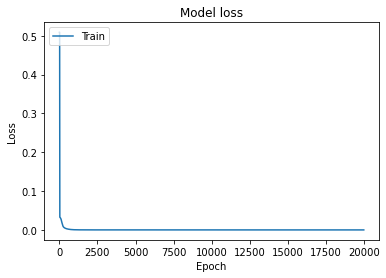

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error

y_pred = estimator.predict(X_test)
print(mean_squared_error(y_test, y_pred))



5/5 [==============================] - 0s 1ms/step
3.232666581692771e-05


In [12]:
np.column_stack((y_test,y_pred))

array([[0.72413793, 0.73123097],
       [0.51724138, 0.5100503 ],
       [0.79310345, 0.80114681],
       ...,
       [0.46551724, 0.46069679],
       [0.39655172, 0.39151123],
       [0.93103448, 0.92499816]])

In [ ]:
# preds = model.predict(x)

# print(mean_squared_error(y, preds))
#print(confusion_matrix(y_train1,y_pred))

# preds = model.predict(x_test)
# y_pred = np.argmax(preds, axis=1)
# y_test1 = np.argmax(y_test, axis=1)
# print(classification_report(y_test1, y_pred))
# print(confusion_matrix(y_test1,y_pred))
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
x